In [24]:
#simulation of AR(2) model from the Ding paper

In [35]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
import sklearn

In [26]:
seed(1)
l = 10000
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesX = Series(series)

seed(3)
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesXtest = Series(series)

In [27]:
seed(2)
series = [gauss(0.0, 1.0) for i in range(l)]
eSeriesY = Series(series)

In [28]:
#check that noise is white, we want mean = 0
#print(seriesX.describe())
#print(seriesY.describe())

In [29]:
X = np.zeros((l,1))
Xtest = np.zeros((l,1))
Y = np.zeros((l,1))
for i in range(l):
    X[i] = .9*X[i-1] - .5*X[i-2] + eSeriesX[i]
    #Xtest[i] = .9*Xtest[i-1] - .5*Xtest[i-2] + eSeriesXtest[i] #Don't really need cause we know parameters

    Y[i] = .8*Y[i-1] - .5*Y[i-2] + .16*X[i-1] - .2*X[i-2] + eSeriesY[i]
    

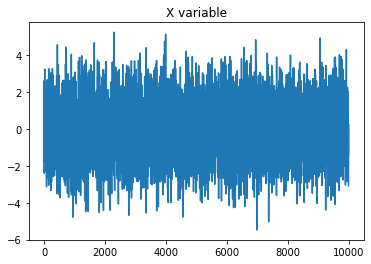

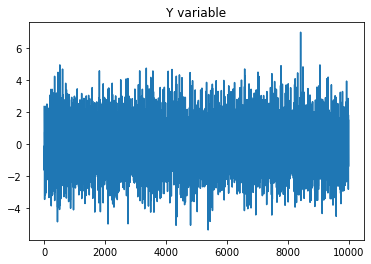

In [30]:
plt.title("X variable")
plt.plot(X)
plt.show()

plt.title("Y variable")
plt.plot(Y)
plt.show()

#plt.title("X test variable")
#plt.plot(Xtest)
#plt.show()

In [31]:
############# Let's try to solve the X series with a memory of p = 8 ##############

In [32]:
c = np.ones((l,1))

X1 = np.roll(X,1)
X1[0] = 0
X2 = np.roll(X1,1)
X2[0] = 0

Y1 = np.roll(Y,1)
Y1[0] = 0

Y2 = np.roll(Y1,1)
Y2[0] = 0

Ax = np.hstack((X1,X2,c))
Ay = np.hstack((X1,X2,Y1,Y2,c))

In [33]:
#Solving the X channel in AR(2)
ols = Ridge(alpha=0)
ols.fit(Ax,X)
ols.coef_

array([[ 0.8993586 , -0.50029722,  0.        ]])

In [34]:
#Solving the Y channel in AR(2)
olsY = Ridge(alpha=0)
olsY.fit(Ay,Y)
olsY.coef_

array([[ 0.15592568, -0.20199186,  0.80358717, -0.50829377,  0.        ]])

In [39]:
olsXCv = sklearn.linear_model.RidgeCV(store_cv_values=True,alpha_per_target=True)
olsXCv.fit(Ax,X)
print("cv values")
print(olsXCv.cv_values_)
print("alpha estimate")
print(olsXCv.alpha_)
print("weight coefs")
print(olsXCv.coef_)
print("best score")
print(olsXCv.best_score_)

cv values
[[[1.65186134e+00 1.65186118e+00 1.65185960e+00]]

 [[2.09538693e+00 2.09569357e+00 2.09875764e+00]]

 [[4.27303805e-03 4.28910124e-03 4.45121882e-03]]

 ...

 [[3.91789071e-03 3.91089619e-03 3.84138648e-03]]

 [[1.44805022e-01 1.44775667e-01 1.44482642e-01]]

 [[8.63745623e+00 8.63757447e+00 8.63875544e+00]]]
alpha estimate
1.0
weight coefs
[[ 0.8992672  -0.50021801  0.        ]]
best score
[-0.9851025]
